In [63]:
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pyclesperanto_prototype as cle
cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (2 refs)>

In [3]:
cells = cle.artificial_tissue_2d()

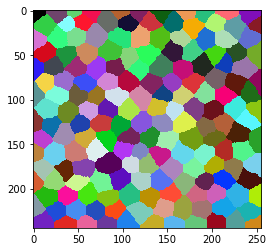

In [4]:
cle.imshow(cells, labels=True)

In [16]:
num_cells = int(np.max(cells))
num_cells

176

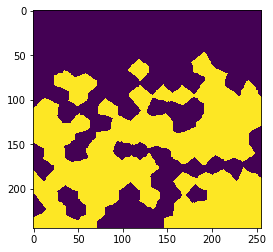

In [47]:
random_values = np.random.random((num_cells + 1)) * range(num_cells + 1)
classification = cle.push(random_values > np.max(random_values) / 4)
classification_image = cle.replace_intensities(cells, classification)
cle.imshow(classification_image)

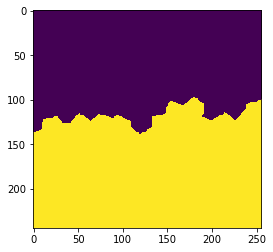

In [48]:
mode_classification_image = cle.mode_of_proximal_neighbors_map(classification_image, cells, max_distance=80)
cle.imshow(mode_classification_image)

Text(0.5, 1.0, 'Corrected cell classification')

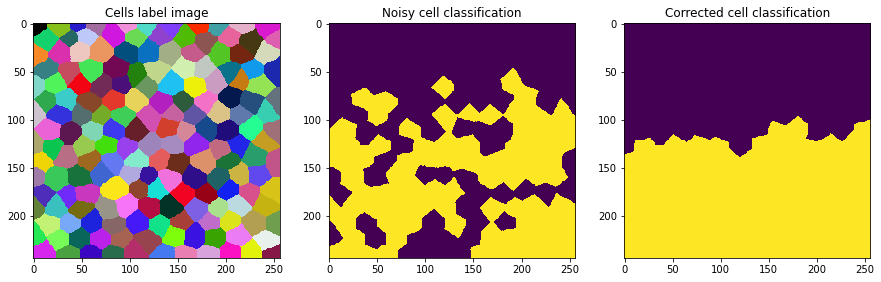

In [53]:
fig, axs = plt.subplots(1, 3, figsize=(15,7))

cle.imshow(cells, labels=True, plot=axs[0])
axs[0].set_title('Cells label image')
cle.imshow(classification_image, plot=axs[1])
axs[1].set_title('Noisy cell classification')
cle.imshow(mode_classification_image, plot=axs[2])
axs[2].set_title('Corrected cell classification')

In [62]:
fig.savefig("mode_cell_classification.png", dpi=400, bbox_inches = 'tight', pad_inches=0.1)

In [64]:
imsave("mode_example_cells.tif", cells)

In [65]:
imsave("mode_example_classification.tif", classification_image)